In [272]:
# Desafio proposto pelo grupo Mulheres em Dados
# Top 50 Spotify Songs - 2019
# LINK: https://www.kaggle.com/leonardopena/top50spotify2019
# Análise de Dados | Machine Learning
# Elaborado por NATHALIA SANTIAGO

In [273]:
#Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
#Importando o dataframe 
df = pd.read_csv('/content/top50.csv', sep=",",encoding='ISO-8859-1')


In [275]:
# Ver nomes das colunas
df.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [276]:
# Retirada da coluna 'Unnamed' pois só possui ids, não será utilizada na análise
df.drop('Unnamed: 0',axis=1,inplace=True)

In [277]:
# Os nomes das colunas possuem maiúsculas, minúsculas, pontos - simplicaremos esses nomes para melhor entendimento
cols = ['track_name','artist_name','genre','bpm','energy',
'danceability','loudness','liveness','valence','length',
'acousticness','speechiness','popularity'] 
df.columns = cols 

In [278]:
# Ver as primeiras linhas da tabela
df.head()

,track_name,artist_name,genre,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [279]:
# Informação sobre os dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_name    50 non-null     object
 1   artist_name   50 non-null     object
 2   genre         50 non-null     object
 3   bpm           50 non-null     int64 
 4   energy        50 non-null     int64 
 5   danceability  50 non-null     int64 
 6   loudness      50 non-null     int64 
 7   liveness      50 non-null     int64 
 8   valence       50 non-null     int64 
 9   length        50 non-null     int64 
 10  acousticness  50 non-null     int64 
 11  speechiness   50 non-null     int64 
 12  popularity    50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [280]:
pd.set_option('precision', 3) # apresentar apenas 3 casas decimais
df.describe()

,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
count,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


In [281]:
# Verificar se há valores nulos - não tem
df.isnull().sum()

track_name      0
artist_name     0
genre           0
bpm             0
energy          0
danceability    0
loudness        0
liveness        0
valence         0
length          0
acousticness    0
speechiness     0
popularity      0
dtype: int64

In [282]:
# agrupando artista x gênero musical
# GroupBy.first = Computed first of values within each group.
artist_genre=df.groupby('artist_name')['genre']
artist_genre.first() 

artist_name
Ali Gatie           canadian hip hop
Anuel AA              reggaeton flow
Ariana Grande              dance pop
Bad Bunny                  reggaeton
Billie Eilish             electropop
Chris Brown                dance pop
DJ Snake                   dance pop
Daddy Yankee                   latin
Drake               canadian hip hop
Ed Sheeran                       pop
J Balvin                       latin
Jhay Cortez           reggaeton flow
Jonas Brothers              boy band
Katy Perry                 dance pop
Khalid                           pop
Kygo                             edm
Lady Gaga                  dance pop
Lauv                       dance pop
Lewis Capaldi                    pop
Lil Nas X                country rap
Lil Tecca                 trap music
Lizzo                    escape room
Lunay                          latin
MEDUZA                     pop house
Maluma                     reggaeton
Marshmello                   brostep
Martin Garrix             

In [283]:
popular_songs = df.groupby('genre')['popularity'].count() # se coloco count vejo quantas vezes aquele gênero apareceu na lista, quando utilizo o first, vejo o valor atribuído a popularidade
print(popular_songs)
#popular_songs.first()
# Agrupando e contando quantas vezes aquele gênero apareceu na lista, as músicas mais populares são do gênero 'dance pop', seguido do 'pop' e 'latin'

genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
Name: popularity, dtype: int64


Text(0, 0.5, 'Qtde de Faixas')

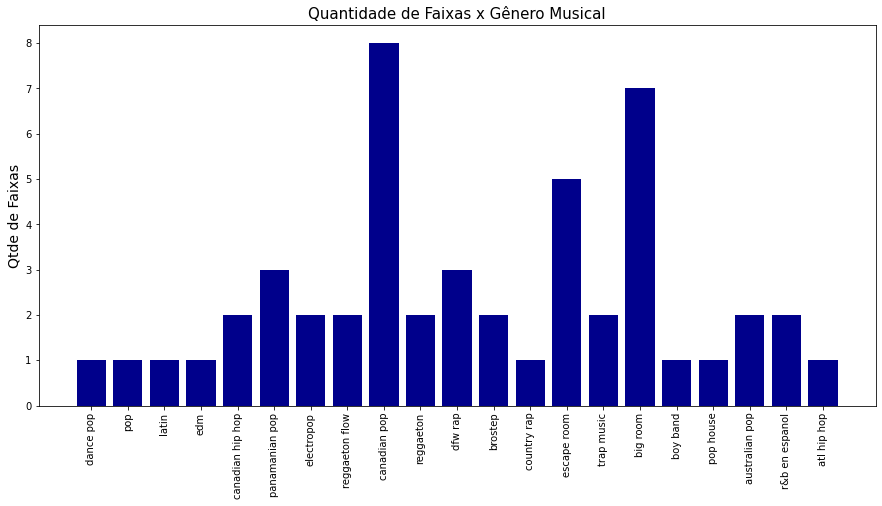

In [284]:
# Gráfico de barras com a quantidade de gênero x faixa de música
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('genre')['track_name'].agg(len)
plt.figure(figsize=(15,7))
plt.bar(length, genre_groupby, color='darkblue')
plt.xticks(length, xtick)
plt.xticks(rotation=90)
plt.title("Quantidade de Faixas x Gênero Musical", fontsize=15)
plt.ylabel('Gênero', fontsize=20)
plt.ylabel('Qtde de Faixas', fontsize=14)

In [285]:
popular_artist = df.groupby('genre')['track_name'].count()
print(popular_artist)
# Dessa forma, vemos que alguns artistas possuem mais de uma música nas mais tocadas:Ed Sheeran(4) e
# Diversos empatados em segundos lugar com duas músicas, por exemplo Ariana Grande, Billie Eilish, Lil Nas X

genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
Name: track_name, dtype: int64


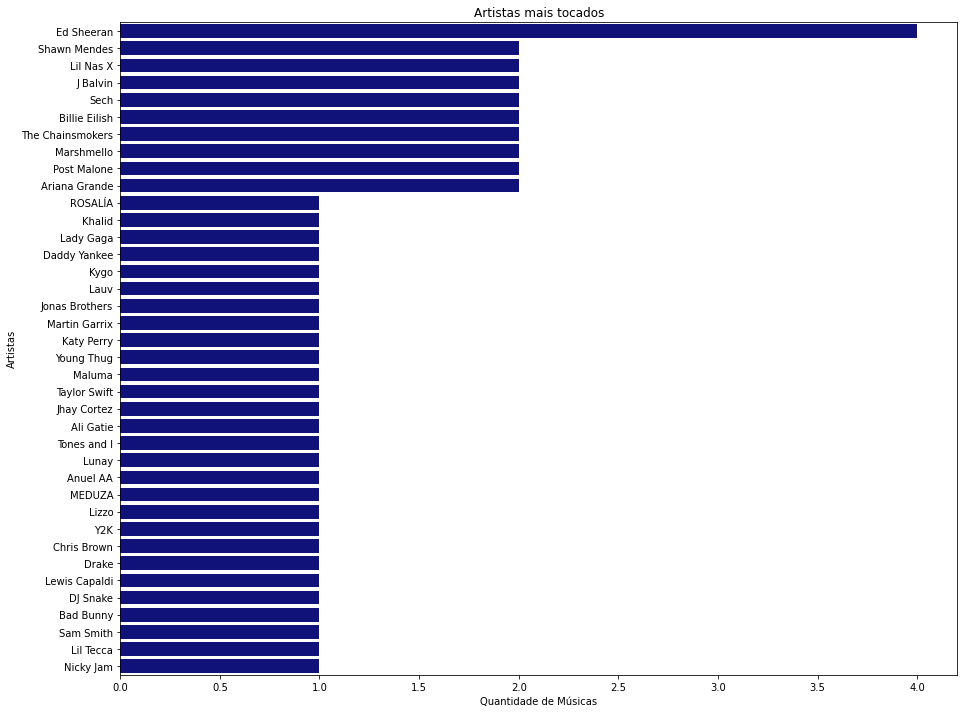

In [286]:
# Ilustrando a informação acima
plt.figure(figsize=(15,12))
ax = sns.countplot(y="artist_name",data=df,color='darkblue',
                   order = df['artist_name'].value_counts().index[:50])
ax.grid(False)
plt.title("Artistas mais tocados")
plt.xlabel('Quantidade de Músicas')
plt.ylabel('Artistas')
plt.show()

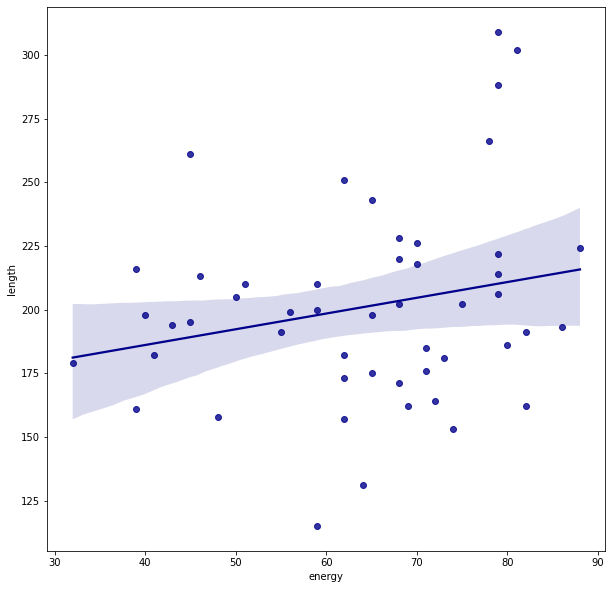

In [287]:
# Relação entre energia e duração da música
fig = plt.subplots(figsize=(10,10))
sns.regplot(x='energy', y='length', data=df, color='darkblue')

In [288]:
# Observando apenas as colunas numéricas, nota-se que as escalas são distintas:
# 'loudness' esta em valores negativos, 'length'/'bpm' em base de centena, entre outros.
# Deve ser necessário normalizar/standarizar os dados mais a frente
df.select_dtypes(include='number')

,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94
5,102,68,80,-5,9,84,220,9,4,84
6,180,64,75,-6,7,23,131,2,29,92
7,111,68,48,-5,8,35,202,15,9,90
8,136,62,88,-6,11,64,157,5,10,87
9,135,43,70,-11,10,56,194,33,38,95


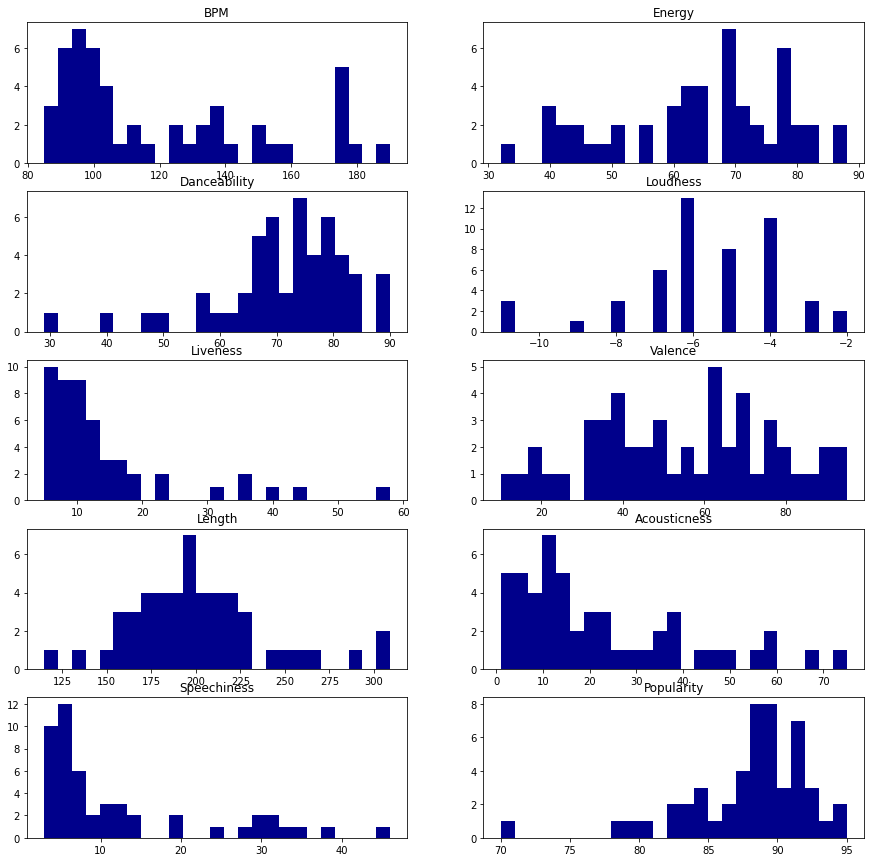

In [289]:
# Observar a distribuição das colunas numéricas

fig, axs = plt.subplots(5,2,figsize=(15,15))

axs[0, 0].hist(df['bpm'],bins=25, color='darkblue') 
axs[0, 0].set_title('BPM')

axs[0, 1].hist(df['energy'],bins=25, color='darkblue') 
axs[0, 1].set_title('Energy')

axs[1, 0].hist(df['danceability'],bins=25, color='darkblue') 
axs[1, 0].set_title('Danceability')

axs[1, 1].hist(df['loudness'],bins=25, color='darkblue') 
axs[1, 1].set_title('Loudness')

axs[2, 0].hist(df['liveness'],bins=25, color='darkblue') 
axs[2, 0].set_title('Liveness')

axs[2, 1].hist(df['valence'],bins=25, color='darkblue') 
axs[2, 1].set_title('Valence')

axs[3, 0].hist(df['length'],bins=25, color='darkblue')
axs[3, 0].set_title('Length')

axs[3, 1].hist(df['acousticness'],bins=25, color='darkblue')
axs[3, 1].set_title('Acousticness')

axs[4, 0].hist(df['speechiness'],bins=25, color='darkblue') 
axs[4, 0].set_title('Speechiness')

axs[4, 1].hist(df['popularity'],bins=25, color='darkblue') 
axs[4, 1].set_title('Popularity')

plt.show()

In [290]:
df.corr()

,bpm,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
bpm,1.000,0.044,-9.418e-02,0.017,-0.167,-0.012,-1.393e-01,-0.031,0.557,0.196
energy,0.044,1.000,1.825e-02,0.671,0.163,0.439,2.247e-01,-0.340,-0.090,-0.080
danceability,-0.094,0.018,1.000e+00,0.016,-0.150,0.173,-1.853e-04,-0.098,-0.103,-0.071
loudness,0.017,0.671,1.625e-02,1.000,0.259,0.238,2.192e-01,-0.138,-0.272,-0.043
liveness,-0.167,0.163,-1.496e-01,0.259,1.000,0.016,1.318e-01,0.021,-0.125,0.093
valence,-0.012,0.439,1.728e-01,0.238,0.016,1.000,-1.778e-02,-0.052,-0.053,-0.318
length,-0.139,0.225,-1.853e-04,0.219,0.132,-0.018,1.000e+00,-0.076,0.047,-0.088
acousticness,-0.031,-0.340,-9.817e-02,-0.138,0.021,-0.052,-7.629e-02,1.000,0.008,-0.035
speechiness,0.557,-0.090,-1.035e-01,-0.272,-0.125,-0.053,4.676e-02,0.008,1.000,0.239
popularity,0.196,-0.080,-7.141e-02,-0.043,0.093,-0.318,-8.764e-02,-0.035,0.239,1.000


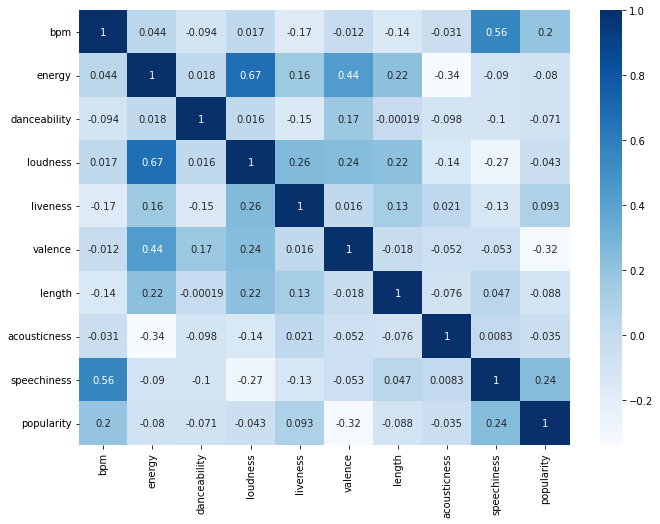

In [291]:
#ver correlações das possíveis features por heatmap
corr = df.corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10}, cmap="Blues")

In [292]:
# No exercício proposto a intenção é ver qual a variável mais influencia na popularidade de uma música, portanto,
# ordenarei o quadro acima do mais correlacionado ao menos correlacionado a coluna 'popularity'.
# abs() = function is used to return the absolute value of a number, i.e., it will remove the negative sign of the number. 
popularity_corr = df.corr()
print("Ordenação de Correlação")
popularity_corr['popularity'].sort_values(ascending=False)


Ordenação de Correlação


popularity      1.000
speechiness     0.239
bpm             0.196
liveness        0.093
acousticness   -0.035
loudness       -0.043
danceability   -0.071
energy         -0.080
length         -0.088
valence        -0.318
Name: popularity, dtype: float64

In [293]:
# Podemos observar que as colunas 'speechness', 'bpm' e 'liveness' são as 3 com maior correlação positiva com a 'Popularity' de uma faixa.
# Se considerarmos em números absolutos, a 'valence' possui a correlação mais forte com a 'popularity'

In [294]:
# Referência: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff#:~:text=Normalization%3A,when%20features%20have%20different%20ranges.
# Standardization: The features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units.
# Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.
# For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. 
# Typical data standardization procedures equalize the range and/or data variability.

# WHY: Standardization assumes that your data has a Gaussian (bell curve) distribution.
# Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about
# your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.



In [295]:
# Após escolha pela standardização, iremos aplicá-la nas colunas numéricas.
# Variável number_col corresponde às 10 colunas:  bpm|energy|danceability|loudness|liveness|valence|length|acousticness|speechiness|popularity
from sklearn.preprocessing import StandardScaler
number_col= df.select_dtypes(include='number')

scaler = StandardScaler() 
data_scaled = scaler.fit_transform(number_col)

In [296]:
#Média e desvio padrão
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-8.65973959e-17 -1.28785871e-16  3.84137167e-16  7.54951657e-17
 -6.66133815e-18 -3.88578059e-17 -2.12052598e-16  3.95516953e-17
 -5.68989300e-17 -4.44089210e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [297]:
# Valores mínimos e máximos - ainda variam muito devido a presença de outliers? 
print('Min values (number_col): ', data_scaled.min(axis=0))
print('Max values (number_col): ', data_scaled.max(axis=0))

Min values (number_col):  [-1.14620685 -2.27555429 -3.58849077 -2.62307329 -0.87765828 -2.01704672
 -2.21829606 -1.12525433 -0.85796387 -3.93581534]
Max values (number_col):  [2.28652901 1.69921303 1.5766328  1.79783675 3.93765113 1.82710061
 2.7880957  2.80994512 3.03364442 1.686778  ]


In [298]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold
#from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [299]:
# Criar dois datasets, um de treino e outro de teste
# Relembrando quais são as colunas numéricas: bpm|energy|danceability|loudness|liveness|valence|length|acousticness|speechiness|popularity
# As colunas 'feature' selecionadas foram aquelas com maior correlação a 'popularity', incluindo a correlação inversa 'valence'
X=df.loc[:,['speechiness', 'bpm', 'liveness', 'valence']].values
y=df.loc[:,'popularity'].values #a variável que queremos prever

In [300]:
print(X)

[[  3 117   8  75]
 [  9 105   8  61]
 [ 46 190  16  70]
 [ 19  93   8  55]
 [  7 150  11  18]
 [  4 102   9  84]
 [ 29 180   7  23]
 [  9 111   8  35]
 [ 10 136  11  64]
 [ 38 135  10  56]
 [ 31 176  24  24]
 [  7  96  15  38]
 [  3 110  11  45]
 [ 20 176   6  76]
 [  5 101  12  10]
 [ 15  93  16  14]
 [ 32 176  11  43]
 [  5  90   7  91]
 [  8 130  14  50]
 [ 11 158  12  41]
 [  3 124   7  63]
 [  8 154  12  48]
 [  7  92   9  58]
 [  4  92  44  80]
 [ 30 135  12  68]
 [  6 124  13  87]
 [ 10  98  18  54]
 [  3  96  19  40]
 [  6  94   6  66]
 [ 25  93  36  94]
 [  4  85  10  36]
 [ 33 140   9  33]
 [ 28  96   9  68]
 [ 15  98  13  18]
 [  6 100  32  39]
 [  6 114  14  32]
 [ 34 176  11  62]
 [  5 152  36  91]
 [  6 138  11  95]
 [  7  95   6  68]
 [  3 104  10  40]
 [  5  85   7  73]
 [  3  96  23  32]
 [ 13 136   6  35]
 [ 12  98   5  75]
 [  5  88  58  44]
 [  6 176   8  80]
 [  5 100  17  67]
 [  3 104  41  50]
 [ 12  95   7  61]]


In [301]:
print(y)

[79 92 85 86 94 84 92 90 87 95 93 86 88 87 92 82 90 91 88 91 91 91 83 91
 89 70 83 89 91 89 84 89 89 89 89 89 91 87 80 78 88 90 87 84 88 88 88 88
 88 82]


In [302]:
# 70% - treino /30% - teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [303]:
# Verificar com quantas linhas e quantas colunas cada conjunto ficou:
# 50 linhas = conjunto original | 35 linhas = treino | 15 linhas = teste
print(X.shape, X_train.shape, X_test.shape)

(50, 4) (35, 4) (15, 4)


In [304]:
# Regressão Linear: A análise de regressão linear é usada para prever o valor de uma variável com base no valor de outra.
# A variável que deseja prever é chamada de variável dependente. A variável que é usada para prever o valor de outra variável é chamada de variável independente.
# Modelos de regressão linear são relativamente simples e fornecem uma fórmula matemática fácil de interpretar que pode gerar previsões.
# Referência: https://www.ibm.com/br-pt/analytics/learn/linear-regression 

In [305]:
# Aplicando a regressão linear - aproximadamente 89.46%
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

89.46976446587693
[ 0.07817838  0.00171778  0.05023026 -0.06992121]


In [306]:
#Comparando os valores atribuídos a 'popularity' e o valor predito pelo modelo de regressão linear
y_pred = regressor.predict(X_test)
df_op = pd.DataFrame({'Atual':y_test, 'Predição':y_pred})
print(df_op)

    Atual  Predição
0      89    90.435
1      88    87.526
2      91    88.648
3      84    87.914
4      88    85.049
5      87    88.787
6      88    85.583
7      90    88.319
8      92    86.490
9      89    88.027
10     78    85.727
11     83    86.572
12     86    88.278
13     87    86.563
14     89    88.600


In [307]:
# PRÓXIMOS PASSOS: 
# TESTAR OUTROS ALGORITMOS - MELHORAR A PROXIMIDADE DE PREDIÇÃO
# REALIZAR TRATAMENTO PARA O DATASET DE TOP 50 - 2020 E UTILIZÁ-LO COMO TESTE